In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats

C:\Users\Rajee\AppData\Local\Temp\ipykernel_32948\59627288.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("crimedata2.csv", encoding='ISO-8859-1')

In [3]:
# all the features we put on the "new lit review" file, may make multiple models depending on which is most accurate.
features = [
    'population', 'PopDens', 'numbUrban', 'pctUrban', 'medIncome', 'MedRent',
    'RentLowQ', 'RentMedian', 'RentHighQ', 'PctHousOccup', 'PctHousOwnOcc', 
    'PersPerOwnOccHous', 'PersPerRentOccHous', 'HousVacant', 'NumInShelters', 
    'NumStreet', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp'
]

# the dataset with all the features we are going to use
filtered_data = data[features]
filtered_data.head()

,population,PopDens,numbUrban,pctUrban,medIncome,MedRent,RentLowQ,RentMedian,RentHighQ,PctHousOccup,PctHousOwnOcc,PersPerOwnOccHous,PersPerRentOccHous,HousVacant,NumInShelters,NumStreet,racepctblack,racePctWhite,racePctAsian,racePctHisp
0,11980,1845.9,11980,100.0,75122,1001,685,1001,1001,98.37,91.01,3.00,2.84,64,11,0,1.37,91.78,6.50,1.88
1,23123,2186.7,23123,100.0,47917,627,467,560,672,97.15,84.88,2.83,1.96,240,0,0,0.80,95.57,3.44,0.85
2,29344,2780.9,29344,100.0,35669,484,370,428,520,95.68,57.79,2.69,2.06,544,16,0,0.74,94.33,3.43,2.35
3,16656,3217.7,0,0.0,20580,333,195,250,309,91.19,54.89,2.51,2.20,669,0,0,1.70,97.35,0.50,0.70
4,11245,974.2,0,0.0,17390,332,202,283,362,92.45,53.57,2.55,2.12,333,2,0,0.53,89.16,1.17,0.52


In [14]:
# replacing ?'s, chaning data types to float, and replacing null values with the mean.
filtered_data.replace('?', pd.NA, inplace=True)
filtered_data = filtered_data.astype(float)
filtered_data.fillna(filtered_data.mean(), inplace=True)

In [15]:
# same thing with y
y = data['nonViolPerPop'].replace('?', pd.NA)
y = pd.to_numeric(y, errors='coerce')
y.fillna(y.mean(), inplace=True)


In [9]:
X = filtered_data

In [10]:
#splitting the dataset 80-20, 80% training, 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#using randomforest regression, as linear regression gave me a mse of over 6.5 mill.
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5504178.942052307


In [13]:
# describes our target variable
print(y.describe())


count     2215.000000
mean      4908.241804
std       2679.020528
min        116.790000
25%       2994.265000
50%       4576.610000
75%       6100.870000
max      27119.760000
Name: nonViolPerPop, dtype: float64


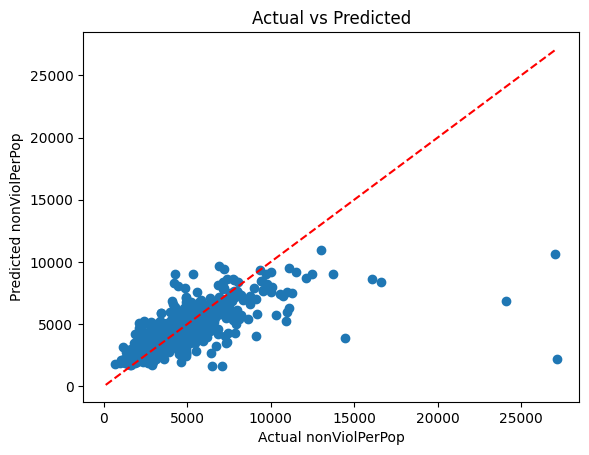

In [50]:
# plotting actual vs predicted values to see how accurate the model is. Also shows outliers.
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual nonViolPerPop')
plt.ylabel('Predicted nonViolPerPop')
plt.title('Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


In [16]:
# most imporant features of the dataset.
feature_importances = model.feature_importances_
feature_names = filtered_data.columns
importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importance.sort_values(by='Importance', ascending=False))


               Feature  Importance
17        racePctWhite    0.208091
4            medIncome    0.166591
16        racepctblack    0.075785
10       PctHousOwnOcc    0.066590
15           NumStreet    0.062588
11   PersPerOwnOccHous    0.053681
9         PctHousOccup    0.046745
13          HousVacant    0.044513
19         racePctHisp    0.039182
0           population    0.031044
18        racePctAsian    0.030311
1              PopDens    0.029819
12  PersPerRentOccHous    0.028808
6             RentLowQ    0.023242
5              MedRent    0.021513
14       NumInShelters    0.020357
8            RentHighQ    0.017685
7           RentMedian    0.016816
2            numbUrban    0.012795
3             pctUrban    0.003844
